In [1]:
# Let's import some packages we'll need.
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import pandas as pd
import autograd.numpy as np
from autograd import grad
from sklearn import datasets
import copy
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn import datasets
import torch
from plot_lib import set_default, plot_data, plot_model, set_default
from matplotlib import pyplot as plt
import random
import torch
from torch import nn, optim
import math
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.linear_model import SGDClassifier 
import seaborn as sns

In [47]:
data = np.genfromtxt('wines.csv', delimiter=',')
iris = datasets.load_iris()
X= stats.zscore(data[1:,:])

cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


In [48]:
variance_explained=(eigen_vals[0]+eigen_vals[1])/sum(eigen_vals)
print(variance_explained)

0.554063383569353


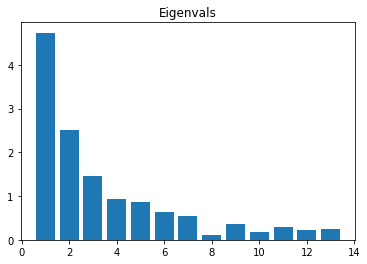

In [49]:
plt.bar(np.linspace(1,len(eigen_vals),len(eigen_vals)),eigen_vals)
plt.title('Eigenvals')
plt.show()

In [50]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

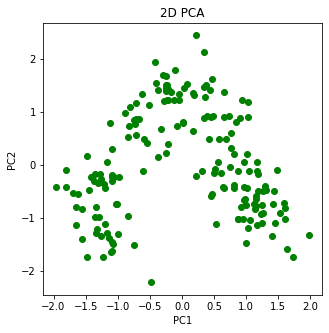

In [51]:
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:,0], X_pca[:,1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA')
plt.show()

In [52]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000).fit_transform(X)
X_embedded.shape

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.395894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.025112
[t-SNE] KL divergence after 1000 iterations: 0.479199


(178, 2)

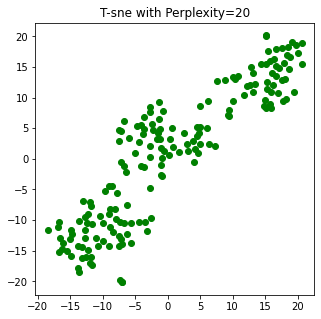

In [53]:
plt.figure(figsize=(5, 5))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c='green')
plt.title('T-sne with Perplexity=20')
plt.show()

In [54]:
A=np.array([[5,0.653679],[10,0.573956],
[15,0.507478],
[20,0.456309],
[25,0.434393],
[30,0.391586],
[35,0.344117],
[40,0.296548],
[45,0.281324],
[50,0.245241],
[55,0.210438],
[60,0.199265],
[65,0.184528],
[70,0.164331],
[75,0.153628],
[80,0.141278],
[85,0.126198],
[90,0.117011],
[95,0.109013],
[100,0.097507],
[105,0.087288],
[110,0.075064],
[115,0.068985],
[120,0.060773],
[125,0.053529],
[130,0.047911],
[135,0.039555],
[140,0.034200]])
print(A[:,0])


[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 140.]


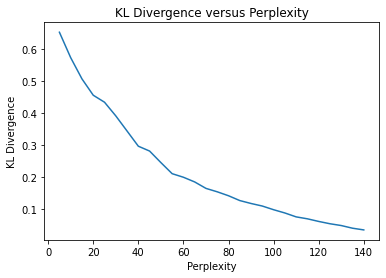

In [55]:
plt.plot(A[:,0], A[:,1])
plt.title('KL Divergence versus Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.show()

In [56]:
mds = MDS(n_components=2, n_init=10, max_iter = 10000, verbose=1, dissimilarity='euclidean') #Create the mds object
X2d=mds.fit_transform(X)

breaking at iteration 195 with stress 23221.818461445735
breaking at iteration 154 with stress 22931.93533120833
breaking at iteration 256 with stress 22476.379222645
breaking at iteration 173 with stress 23085.233665610238
breaking at iteration 208 with stress 23690.9871996547
breaking at iteration 132 with stress 23282.15623638955
breaking at iteration 176 with stress 24296.369285153432
breaking at iteration 151 with stress 23109.113146980046
breaking at iteration 138 with stress 23177.595977272907
breaking at iteration 127 with stress 23077.481490852402


(178, 2)


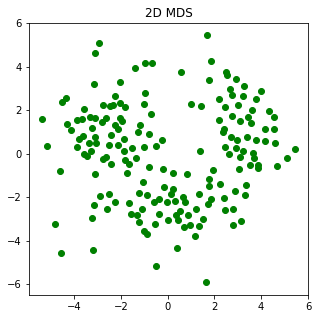

In [57]:
print(X2d.shape)
plt.figure(figsize=(5, 5))
plt.scatter(X2d[:,0], X2d[:,1], c='green')
plt.title('2D MDS')
plt.show()

In [65]:
X2 = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000).fit_transform(X)
X2.shape

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.395894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.379498
[t-SNE] KL divergence after 1000 iterations: 0.462524


(178, 2)

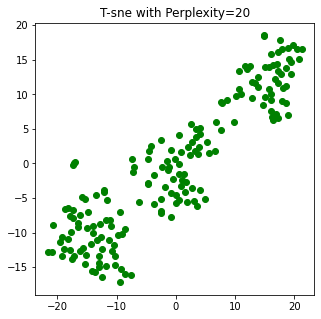

In [66]:
plt.figure(figsize=(5, 5))
plt.scatter(X2[:,0], X2[:,1], c='green')
plt.title('T-sne with Perplexity=20')
plt.show()

In [67]:
range_n_clusters = [2, 3, 4, 5, 6]
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.59103906
For n_clusters = 3 The average silhouette_score is : 0.6205517
For n_clusters = 4 The average silhouette_score is : 0.5326116
For n_clusters = 5 The average silhouette_score is : 0.44680288
For n_clusters = 6 The average silhouette_score is : 0.38771918


In [68]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(X2)

KMeans(n_clusters=3, n_init=100)

In [69]:
k_means.inertia_

4641.5849609375

In [72]:
print(cluster_center)

[15.544554 12.100852]


Text(-15, 15, 'inertia=4794.8125')

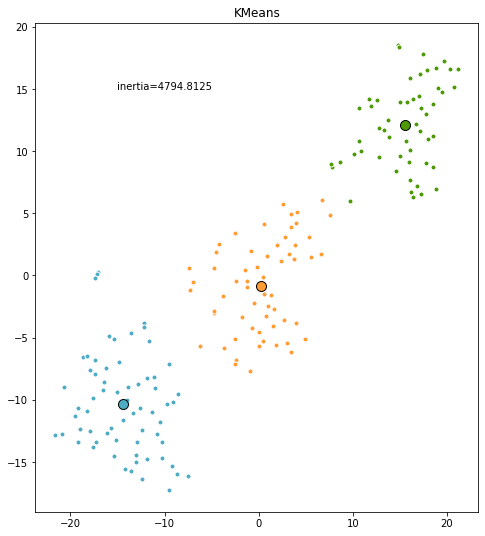

In [70]:
fig = plt.figure(figsize=(27, 9))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

stepSize = math.floor(X2.shape[0]/100) # plot 10000 points only
Xplot = X2[0:-1:stepSize, :]
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

k_means_labels = pairwise_distances_argmin(Xplot, k_means_cluster_centers)


# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(Xplot[my_members, 0], Xplot[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
ax.set_title('KMeans')
plt.text(-15, 15, 'inertia=4794.8125')

In [20]:
## DBSCAN Algorithm
def region_query (p, eps, X):
    # These lines check that the inputs `p` and `X` have
    # the right shape.
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    ### BEGIN SOLUTION
    return np.linalg.norm (p - X, axis=1) <= eps
    ### END SOLUTION

def index_set (y):
    """
    Given a boolean vector, this function returns
    the indices of all True elements.
    """
    assert len (y.shape) == 1

    ### BEGIN SOLUTION
    return set (np.where (y)[0])
    ### END SOLUTION

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = [] # Empty list to start
    ### BEGIN SOLUTION
    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)
    ### END SOLUTION
    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()
    ### BEGIN SOLUTION
    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)
    ### END SOLUTION
    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):
    # Assume the caller performs Steps 1 and 2 of the procedure.
    # That means 'p' must be a core point that is part of a cluster.
    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])  # Step 3
    while reachable:
        q = reachable.pop () # Step 4
        
        # Put your reordered and correctly indented statements here:
        ### BEGIN SOLUTION
        if q not in visited:
            visited.add (q) # Mark q as visited
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
        ### END SOLUTION
        
    # This procedure does not return anything
    # except via updates to `visited` and
    # `assignment`.
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: # for each core point i
        if i not in visited:
            visited.add (i) # Mark i as visited
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

In [21]:
assignment, core_set = dbscan (3.63, 6, X2)

print ("Number of core points:", len (core_set))
print ("Number of clusters:", max (assignment.values ())+1)
print ("Number of unclassified points:", len (X) - len (assignment))



Number of core points: 163
Number of clusters: 3
Number of unclassified points: 3


Text(-15, 15, 'eps=3.63, s=6')

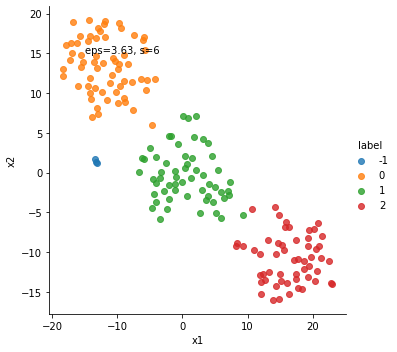

In [22]:
def make_scatter_plot2 (df, x="x1", y="x2", hue="label", size=5):
    if (hue is not None) and (hue in df.columns):
        sns.lmplot (x=x, y=y, hue=hue, data=df,
                    fit_reg=False)
    else:
        sns.lmplot (x=x, y=y, data=df, fit_reg=False)
        
        
def plot_labels (df1, labels):
    df=pd.DataFrame(df1,columns=['x1','x2'])
    df_labeled = df.copy ()
    df_labeled['label'] = labels
    make_scatter_plot2 (df_labeled)

labels = [-1] * len (X2)
for i, c in assignment.items ():
    labels[i] = c
plot_labels (X2, labels)
plt.text(-15, 15, 'eps=3.63, s=6')